In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
raw_data_folder_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset")
data_UTD19 = pd.read_csv(raw_data_folder_path / "utd19_u.csv", low_memory=False)
data_links = pd.read_csv(raw_data_folder_path / "links.csv")
data_detectors = pd.read_csv(raw_data_folder_path / "detectors.csv")

In [4]:
weather = pd.read_csv("D:\All Python\All_Big_raw_Data\LOS prediction\Environment Dataset/all_fields_weather.csv")
# weather = weather.iloc[:, [24, 26, 6]]
weather.iloc[:,1] = weather.iloc[:,1]*3600
weather.day = pd.to_datetime(weather.day)
weather

,name,datetime,temp,feelslike,dew,humidity,rainfall,precipprob,preciptype,snow,...,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,day,rain_intensity,interval
0,luzern,2015-01-01 00:00:002015-01-01 00:00:002015-01-...,-3.4,-6.0,-4.8,90.04,0.000,0,NaN,0.0,...,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"66,570,999,990,661,300,000,000,000,000,000,000...",2015-01-01,Slight rain,0.0
1,luzern,2015-01-01 01:00:002015-01-01 01:00:002015-01-...,-3.4,-6.7,-4.8,90.06,0.000,0,NaN,0.0,...,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"66,570,999,990,661,300,000,000,000,000,000,000...",2015-01-01,Slight rain,3600.0
2,luzern,2015-01-01 02:00:002015-01-01 02:00:002015-01-...,-3.3,-3.3,-4.8,89.57,0.000,0,NaN,0.0,...,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"66,570,999,990,661,300,000,000,000,000,000,000...",2015-01-01,Slight rain,7200.0
3,luzern,2015-01-01 03:00:002015-01-01 03:00:002015-01-...,-3.6,-8.1,-5.0,90.60,0.000,0,NaN,0.0,...,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"66,570,999,990,661,300,000,000,000,000,000,000...",2015-01-01,Slight rain,10800.0
4,luzern,2015-01-01 04:00:002015-01-01 04:00:002015-01-...,-3.1,-5.1,-4.4,91.14,0.000,0,NaN,0.0,...,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"66,570,999,990,661,300,000,000,000,000,000,000...",2015-01-01,Slight rain,14400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Luzern,2015-12-31 19:00:002015-12-31 19:00:002015-12-...,4.4,4.4,3.6,94.87,0.097,100,rain,0.0,...,0.0,0.0,0,NaN,"Rain, Overcast",rain,"06657099999,06650099999,06659099999,0667409999...",2015-12-31,Slight rain,68400.0
8756,Luzern,2015-12-31 20:00:002015-12-31 20:00:002015-12-...,4.5,4.5,3.9,95.51,0.111,100,rain,0.0,...,0.0,0.0,0,NaN,"Rain, Overcast",rain,"06657099999,06650099999,06659099999,0667409999...",2015-12-31,Slight rain,72000.0
8757,Luzern,2015-12-31 21:00:002015-12-31 21:00:002015-12-...,4.4,4.4,3.9,96.75,0.399,100,rain,0.0,...,0.0,0.0,0,NaN,"Rain, Overcast",rain,"06657099999,06650099999,06659099999,0667409999...",2015-12-31,Slight rain,75600.0
8758,Luzern,2015-12-31 22:00:002015-12-31 22:00:002015-12-...,4.5,4.5,3.9,95.49,0.396,100,rain,0.0,...,0.0,0.0,0,NaN,"Rain, Overcast",rain,"06657099999,06650099999,06659099999,0667409999...",2015-12-31,Slight rain,79200.0


In [5]:
import data_preparation
dataloader = data_preparation.DataLoader_MultiCity(data=data_UTD19, detectors_data=data_detectors, weather_data=weather)  # london, luzern, hamburg

In [6]:
luzern = dataloader.pick_city(["luzern"])

[INFO] ['luzern'] was/were picked successfully.


In [12]:
train_data, val_data, test_data = luzern.fit()

[INFO] data loaded successfully.
[INFO] speed and density produced successfully.
[INFO] Data #transformed# successfully.
[INFO] Data merged with weather successfully.
[INFO] LOS founded and added to data!
[INFO] Split successful.
[INFO] Saved successfully.


In [13]:
data = luzern.merged_data
data.to_csv("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset/DataLoader/full_luzern.csv")

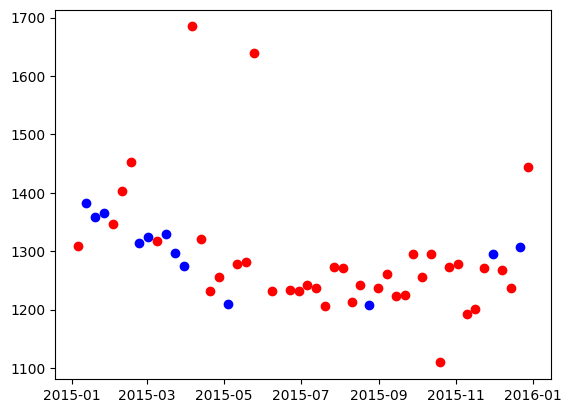

In [25]:
data1 = data[data["rainfall"] > 0]
data2 = data[data["rainfall"] == 0]

data_monday_rainfall = data1[data1["date"].dt.dayofweek == 0]
data_tuesday_rainfall = data1[data1["date"].dt.dayofweek == 1]
data_wednesday_rainfall = data1[data1["date"].dt.dayofweek == 2]
data_thursday_rainfall = data1[data1["date"].dt.dayofweek == 3]
data_friday_rainfall = data1[data1["date"].dt.dayofweek == 4]
data_saturday_rainfall = data1[data1["date"].dt.dayofweek == 5]
data_sunday_rainfall = data1[data1["date"].dt.dayofweek == 6]

data_monday_rainfall_at_9 = data_monday_rainfall[data_monday_rainfall["date"].dt.hour == 9]
data_tuesday_rainfall_at_9 = data_tuesday_rainfall[data_tuesday_rainfall["date"].dt.hour == 9]
data_wednesday_rainfall_at_9 = data_wednesday_rainfall[data_wednesday_rainfall["date"].dt.hour == 9]
data_thursday_rainfall_at_9 = data_thursday_rainfall[data_thursday_rainfall["date"].dt.hour == 9]
data_friday_rainfall_at_9 = data_friday_rainfall[data_friday_rainfall["date"].dt.hour == 9]
data_saturday_rainfall_at_9 = data_saturday_rainfall[data_saturday_rainfall["date"].dt.hour == 9]
data_sunday_rainfall_at_9 = data_sunday_rainfall[data_sunday_rainfall["date"].dt.hour == 9]

data_monday_norainfall = data2[data2["date"].dt.dayofweek == 0]
data_tuesday_norainfall = data2[data2["date"].dt.dayofweek == 1]
data_wednesday_norainfall = data2[data2["date"].dt.dayofweek == 2]
data_thursday_norainfall = data2[data2["date"].dt.dayofweek == 3]
data_friday_norainfall = data2[data2["date"].dt.dayofweek == 4]
data_saturday_norainfall = data2[data2["date"].dt.dayofweek == 5]
data_sunday_norainfall = data2[data2["date"].dt.dayofweek == 6]

data_monday_norainfall_at_9 = data_monday_norainfall[data_monday_norainfall["date"].dt.hour == 9]
data_tuesday_norainfall_at_9 = data_tuesday_norainfall[data_tuesday_norainfall["date"].dt.hour == 9]
data_wednesday_norainfall_at_9 = data_wednesday_norainfall[data_wednesday_norainfall["date"].dt.hour == 9]
data_thursday_norainfall_at_9 = data_thursday_norainfall[data_thursday_norainfall["date"].dt.hour == 9]
data_friday_norainfall_at_9 = data_friday_norainfall[data_friday_norainfall["date"].dt.hour == 9]
data_saturday_norainfall_at_9 = data_saturday_norainfall[data_saturday_norainfall["date"].dt.hour == 9]
data_sunday_norainfall_at_9 = data_sunday_norainfall[data_sunday_norainfall["date"].dt.hour == 9]

# mask1 = data1["date"].dt.dayofweek == 7
# mask2 = data2["date"].dt.dayofweek == 7
# data1[mask1]["flow"].mean(), data2[mask2]["flow"].mean()

import matplotlib.pyplot as plt

plt.scatter(data_monday_rainfall_at_9["date"], data_monday_rainfall_at_9["speed"], c="blue")
plt.scatter(data_monday_norainfall_at_9["date"], data_monday_norainfall_at_9["speed"],  c="red")